In [11]:
import sqlite3
import pandas as pd
import sys
import os
if os.path.abspath(".").endswith("tools"):
    os.chdir("..")

PATH = "./tools/july/aibe_coffee.db"

from backend.data_manager import DataManager
data_manager = DataManager(PATH)
data_manager.get_users_recently_consumed()

[('AHMED SOFAN', 0, 0.0),
 ('ALINA S', 3.15, 5.599999999999999),
 ('AMIN', 1.5, 2.4),
 ('ANKI', 2.4000000000000004, 5.2),
 ('ANNE BUESSEN', 0.35, 0.7),
 ('ANNE K', 0.4, 0.4),
 ('ANNE SOPHIA', 3.05, 6.549999999999998),
 ('ANNIKA H', 0, 0.0),
 ('ARKANIVA', 0.4, 0.4),
 ('BELINDA CZIERINSKI', 0, 0.35),
 ('BERKAY AKARSU', 3.1, 4.249999999999999),
 ('BERNHARD', 0, 1.5499999999999998),
 ('CJ', 1.75, 2.8000000000000003),
 ('CLAUDIA', 2.0, 3.1999999999999997),
 ('DAVID BLUMENTHAL', 1.1, 1.1),
 ('DRWHO', 6.35, 7.6999999999999975),
 ('FABI WOLLER', 2.4, 2.9999999999999996),
 ('FABIO', 6.3, 1.0499999999999998),
 ('FLO MEHRKENS', 3.5, 2.45),
 ('FRANZISKA', 0.8, 2.4),
 ('HANNAH B BRAUN', 2.0999999999999996, 4.8999999999999995),
 ('ISLAM', 0, 0.0),
 ('JANNA', 3.15, 4.55),
 ('JASMIN', 0, 1.3),
 ('JOHANNA MUELLER', 1.2, 2.4),
 ('JONAS A', 0.8999999999999999, 2.1),
 ('JONAS FU', 0, 0.0),
 ('JULIAN FISCHER', 0.8999999999999999, 0.8999999999999999),
 ('KATHARINA', 1.0499999999999998, 2.1),
 ('LAURA RABADA

In [12]:
conn = sqlite3.connect(PATH)
cur = conn.cursor()

In [13]:
users = pd.read_sql_query("SELECT * FROM users", conn)
print(users)

    id                user   debt
0    1           RENE GROH   7.70
1    2      HANNAH B BRAUN   4.90
2    3             ALINA S   5.60
3    4        LUISA NEUBIG  12.45
4    5              NIE DA  11.20
5    6             SIMON B   0.00
6    7                ANKI   5.20
7    8               JANNA   4.55
8    9               MAREK   2.70
9   10             JONAS A   2.10
10  11           FRANZISKA   2.40
11  12               SILVI   0.95
12  13                  CJ   2.80
13  14             MARLENE   4.70
14  15                MAJA   5.25
15  16              ANNE K   0.40
16  17              MISCHA  14.10
17  18            JONAS FU   0.00
18  19            ANNIKA H   0.00
19  20         ANNE SOPHIA   6.55
20  21     JOHANNA MUELLER   2.40
21  22        ANNE BUESSEN   0.70
22  23            BERNHARD   1.55
23  24               SEBII   0.00
24  25      JULIAN FISCHER   0.90
25  26         AHMED SOFAN   0.00
26  27               FABIO   1.05
27  28                RAMY   2.00
28  29        

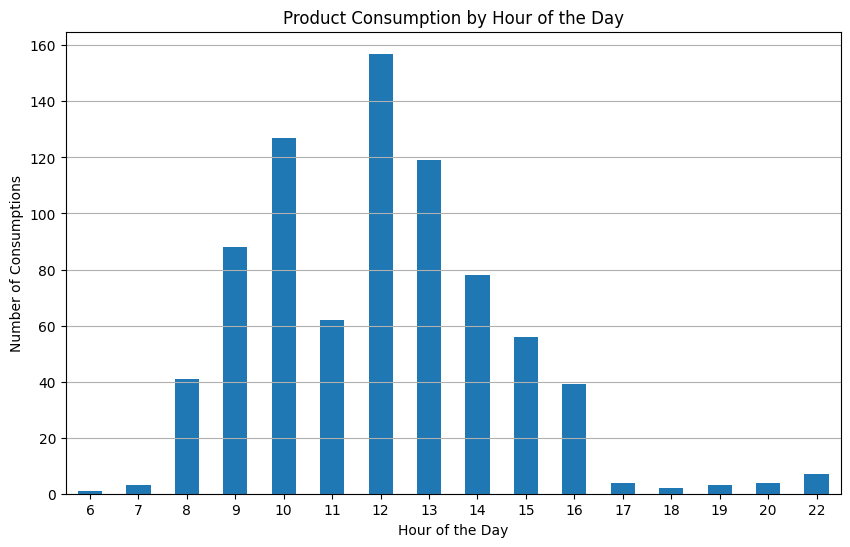

In [23]:
import matplotlib.pyplot as plt

consumed_products = pd.read_sql_query("SELECT * FROM consumed", conn)
consumed_products = pd.DataFrame(consumed_products)
# Convert the time_stamp column to datetime
consumed_products['time_stamp'] = pd.to_datetime(consumed_products['time_stamp'])

# Extract the hour from the time_stamp column
consumed_products['hour'] = (consumed_products['time_stamp'].dt.hour + 11) % 24

# Group by the hour and count the number of consumptions
consumption_by_hour = consumed_products.groupby('hour').size()

# Plotting
plt.figure(figsize=(10, 6))
consumption_by_hour.plot(kind='bar')
plt.title('Product Consumption by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Consumptions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

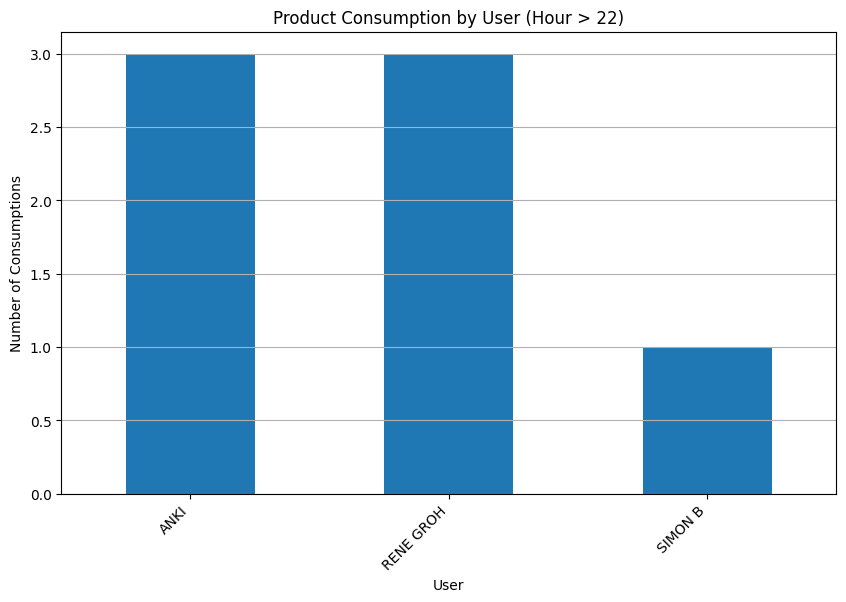

In [25]:
# Filter data for hours greater than 22
late_night_consumptions = consumed_products[consumed_products['hour'] >= 22]

# Group by user and count the number of consumptions
consumption_by_user = late_night_consumptions.groupby('user').size()

# Plotting
plt.figure(figsize=(10, 6))
consumption_by_user.plot(kind='bar')
plt.title('Product Consumption by User (Hour > 22)')
plt.xlabel('User')
plt.ylabel('Number of Consumptions')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

In [27]:
late_night_consumptions = consumed_products[consumed_products['hour'] >= 22]
late_night_consumptions 


,id,user,product,options,price,time_stamp,hour
7,8,RENE GROH,coffee,milk,0.35,2024-06-03 11:14:06.263962,22
8,9,SIMON B,coffee,milk,0.35,2024-06-03 11:15:06.156695,22
9,10,RENE GROH,coffee,milk,0.35,2024-06-03 11:15:55.143419,22
10,11,RENE GROH,coffee,milk,0.35,2024-06-03 11:16:00.532816,22
11,12,ANKI,capuccino,,0.40,2024-06-03 11:38:11.880739,22
12,13,ANKI,capuccino,,0.40,2024-06-03 11:38:24.368412,22
13,14,ANKI,glass of milk,,0.50,2024-06-03 11:38:39.417425,22


[('MIS', 4.45, 0.8), ('TY', 12.3, 10.3)]